In [1]:
import os
from google.colab import drive
# Authenticate for google drive integration
drive.mount('/gdrive/',force_remount=True)

Mounted at /gdrive/


In [2]:
import os
os.chdir("/gdrive/My Drive/EDAMI_PROJECT_GR_7")

In [3]:
!pip install hdbscan

In [3]:
from custom_dbscan import DBSCAN
import hdbscan
from sklearn.cluster import make_blobs
import sklearn.datasets
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns


In [59]:
def benchmark(dataset_sizes,dataset_dimension,cluster_function, kwargs ):

  time_takens = []

  for size in dataset_sizes:

    data, _ = sklearn.datasets.make_blobs(n_samples=size, 
                                                        n_features=dataset_dimension, 
                                                        centers=5)
    start_time = time.time()
    cluster_function(data, **kwargs)
    time_taken = time.time() - start_time
    time_takens.append(round(time_taken,6))

  return time_takens

In [91]:
dataset_sizes = np.array([500,1000,5000,10000])

## DBSCAN custom


In [ ]:
kwargs ={"Eps":1.31, "MinPt":5}
custom_dbscan = DBSCAN()
times_db = benchmark(dataset_sizes,2,custom_dbscan.fit,kwargs)
times_db

## DBSCAN sklearn

In [87]:
dbscan_sk = sklearn.cluster.DBSCAN(eps=1.31, min_samples=5)
times_db_sklearn = benchmark(dataset_sizes,2,dbscan_sk.fit,{})
times_db_sklearn

[0.006657, 0.009748, 0.024728, 0.057215, 0.470227]

## HDBSCAN

In [88]:
hdbscan_ = hdbscan.HDBSCAN()
times_hdb = benchmark(dataset_sizes,2,hdbscan_.fit,{})
times_hdb

[0.013884, 0.019707, 0.041431, 0.063288, 0.249938]

Text(0.5, 1.0, 'Performance Comparison of DBSCAN Algorithms')

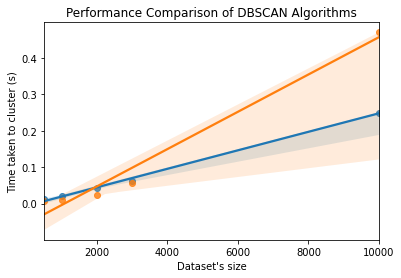

In [90]:
sns.regplot(x=dataset_sizes, y= times_db, label = 'Custom DBSCAN')
sns.regplot(x=dataset_sizes,y=times_db_sklearn,'Sklearn DBSCAN')
sns.regplot(x=dataset_sizes, y= times_hdb, 'HDBSCAN')
plt.gca().set_xlabel("Dataset's size")
plt.gca().set_ylabel('Time taken to cluster (s)')
plt.title('Performance Comparison of DBSCAN Algorithms')
plt.legend()